# ggplot 101 - the basics 

This notebook demonstrates the ggplot basics.
- use ggplot(data= ) to specify what data to use (specify the used dataframe)
- use mapping=aes() to specify how to map data from specified columns onto specified visual properties   
  (map specific columns to x,y position, color, size etc.)  
- use a geom to specify in what "geometry" we want to show the data (show as points, lines, barcharts etc)

# 0 - setup notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import * 

# 1 - get some data

We will use the diamonds dataset.  

Before we proceed it is wise to have a good look at this data.  
We will do a EDA (Exploratory Data Analysis).  
Have a look at the [EDA](apdx00_EDA_of_diamonds_data.ipynb)

In [3]:
dia = pd.read_csv('./dat/dia.csv')


# 2 - example : scatter-plot showing price by carat

## Step 1 - create the base layer (specify used data and x and y axis)
Note: this creates an empty grid on which the visualizations can be projected

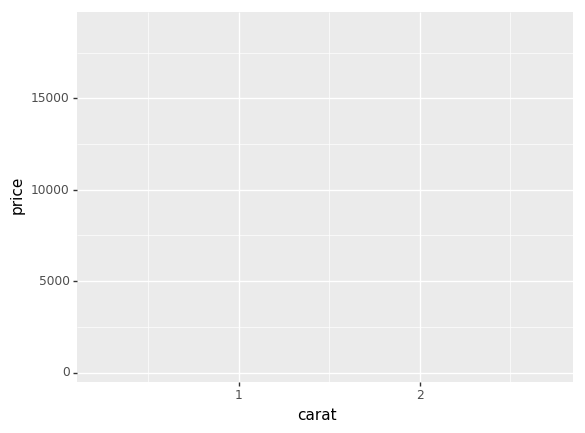

<ggplot: (-9223372036841372896)>


In [4]:
# the data source is the dataframe dia
# allong the x axis we want to plot the carats and the y axis should show the price   
# i.o.w. we want to map carat upon the x and price upon the y
# the x= and y= are "aestetics" specifications (i.e. specification of the way the data is made visible) 
figure = ggplot(data=dia, mapping=aes(x='carat', y='price') )
# this defines which data we want to use and what the axis are, 
# but ggplot does not yet know in which geometry to show the data
# so when we print figure, ggplot only shows a blank canvas
print(figure)

## Step 2 -  add the first data visualization layer

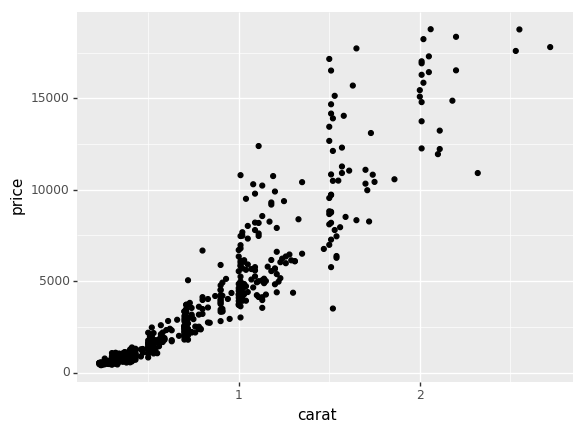

<ggplot: (13402923)>


In [5]:
# we can specify in which geometry we want to see the data by specifying the geom to use
# show the data as points by adding a geom_point() to the figure
figure = ggplot( data=dia, mapping=aes(x='carat', y='price'))
figure = figure + geom_point()
print(figure)

The documentation of the geom_points() can be found [here](http://ggplot.yhathq.com/docs/geom_point.html)  

============================================================================

According to the documentation points not only take the arguments x= , y=   
but also size= , shape= , color= , alpha= .   
These properties may be specified in the geom when they are constants -i.e. not mappings of column values-.

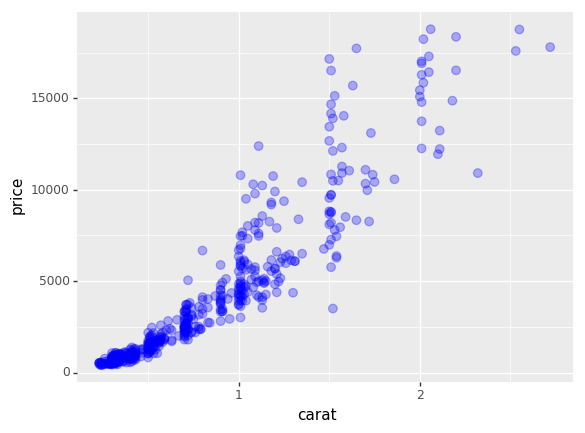

<ggplot: (13530972)>


In [13]:
figure = ggplot(data=dia, mapping=aes(x='carat', y='price'))
figure = figure + geom_point(color='blue', size=3, alpha=0.3 )
print(figure)

Now the the points are blue, have a larger size and are transparent (alpha is set to 0.3).  
The possible values of color can be found [here](https://www.google.nl/imgres?imgurl=https%3A%2F%2Fmatplotlib.org%2F1.5.1%2Fmpl_examples%2Fcolor%2Fnamed_colors.hires.png&imgrefurl=https%3A%2F%2Fmatplotlib.org%2F1.5.1%2Fexamples%2Fcolor%2Fnamed_colors.html&docid=1U1xY3Tv6iw77M&tbnid=N8U4y3Ixxxi7JM%3A&vet=10ahUKEwinpt7AqITUAhXKUlAKHVVtAdoQMwgtKAcwBw..i&w=1100&h=900&hl=nl&bih=1066&biw=1920&q=python%20color%20names&ved=0ahUKEwinpt7AqITUAhXKUlAKHVVtAdoQMwgtKAcwBw&iact=mrc&uact=8).  
(or use hex-color codes generated by a [color picker](https://www.w3schools.com/colors/colors_picker.asp) )  
Alpha can vary between 0 (completely transparent) and 1 (not transparent at all)

===============================================================

In the figure below each point displays all 4 properties of the diamond
- the X position shows the carats
- the Y position shows the price
- the color of the point shows the color of the diamond
- the shape of the point shows the cut

Note that now the color and shape properties must be specified in a mapping=aes().  
(since we mapped the data in columns onto these properties)

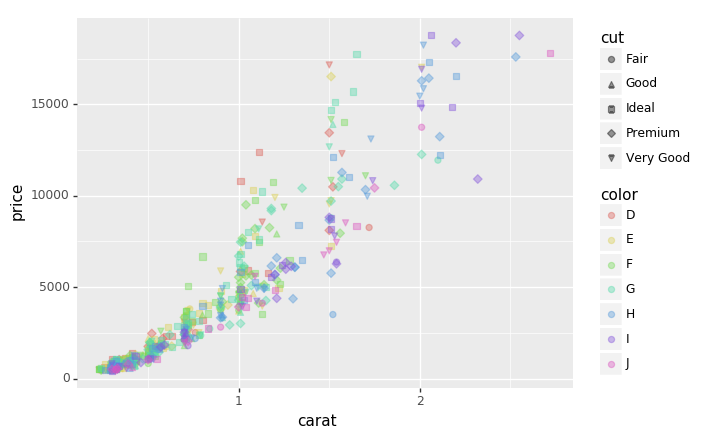

<ggplot: (-9223372036841244798)>


In [14]:
figure = ggplot( data=dia, mapping=aes(x='carat', y='price', color='color', shape='cut'))
figure = figure + geom_point(size=2, alpha=0.4 )
print(figure)

NOTE 1 The aes() function determines the appearance - the aesthetics - of the points.  
The mapping=aes() maps data onto specified ways to make data visible (i.e. map onto x or y coordinate, color, size or shape)

NOTE 2 We have made the points transparent by setting the alpha to 0.4   
(the points are transparent, so the points on the top do not completely hide the points below)

## Step 3 - add a second data visualization layer

Each geom creates a layer.  
Layers can be stacked.  
Here is an example with two layers on top of each other.  
(actually there are three layers: the base layer + two geoms)

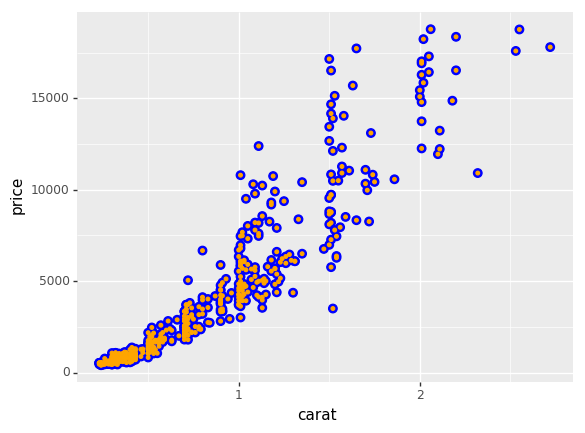

<ggplot: (8302691)>


In [8]:
figure = ggplot(data=dia, mapping=aes(x='carat', y='price'))
figure = figure + geom_point(color='blue', size=3 )
figure = figure + geom_point(color='orange', size=1 )
print(figure)

The first geom draws big blue circles.  
The second geom adds a new layer with smaller orange circles at the same position  
(hence the orange circles appear to be within the blue ones)

Now lets switch the order of the geoms

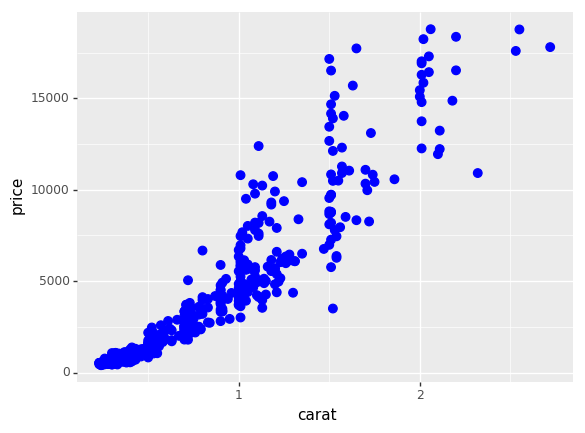

<ggplot: (8253167)>


In [9]:
figure = ggplot(data=dia, mapping=aes(x='carat', y='price'))
figure = figure + geom_point(color='orange', size=1 )
figure = figure + geom_point(color='blue', size=3 )
print(figure)

Here we draw the small orange circles first.  
Second the big blue circles are drawn on top of the orange ones  
The orange circles are hidden behind the blue ones.  
So order matters. 

When we make the blue circles transparent, the orange will be visible again.

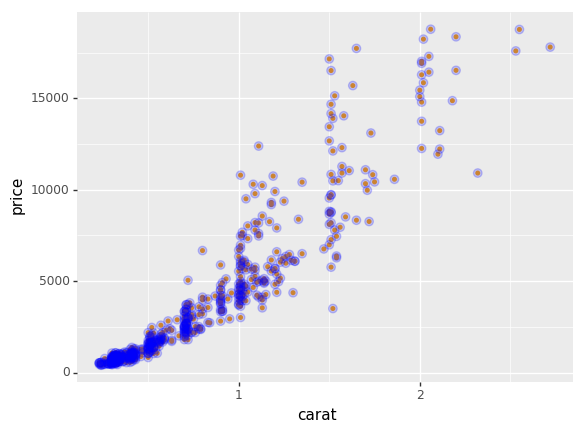

<ggplot: (8265143)>


In [11]:
figure = ggplot(data=dia, mapping=aes(x='carat', y='price'))
figure = figure + geom_point(color='orange', size=1 )
figure = figure + geom_point(color='blue', size=3 , alpha=0.2)
print(figure)

Now we see indeed some orange, but trough a blue haze.